In [1]:
import os
from c3dev.galmocks.galhalo_models.baryonic_effects.load_tng_ds_fitting_data import load_tng_megafile


tng_megafile_0d3, lgrbins = load_tng_megafile(bnpat='0d3')
tng_megafile_0d5, lgrbins = load_tng_megafile(bnpat='0d5')
tng_megafile_1d0, lgrbins = load_tng_megafile(bnpat='1d0')
ztargets = np.array((0.3, 0.5, 1.0))

lgrmids = 0.5*(lgrbins[:-1] + lgrbins[1:])
lgrarr = np.linspace(-1.5, 2, 500)

print(tng_megafile_0d3.keys())
pkey = 'p_c200c'

['gass_mass', 'dm_mass', 'tracer_mass', 'stellar_mass', 'bh_mass', 'x', 'y', 'z', 'SubhaloGrNr', 'SubhaloMass', 'M200c', 'M_acc_dyn', 'c200c', 'DS_TNG', 'DS_TNG_DARK', 'DS_ratio', 'lgMsub', 'p_M_acc_dyn', 'p_stellar_mass', 'p_gass_mass', 'p_c200c']


In [2]:
from c3dev.galmocks.galhalo_models import baryonic_effects as beff

args = tng_megafile_0d3, tng_megafile_0d5, tng_megafile_1d0
lgmh_bins, tng_ds_target_data = beff.load_tng_ds_fitting_data.measure_target_data_unit_testing(*args)

In [3]:
def _mse(pred, target):
    diff = pred - target
    return jnp.mean(diff**2)

lgm=12.5, loss=0.010
lgm=12.9, loss=0.007
lgm=13.4, loss=0.008
lgm=13.8, loss=0.015
lgm=14.2, loss=0.022


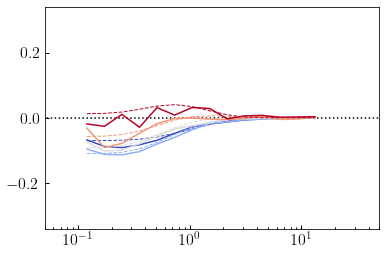

In [4]:
import matplotlib.cm as cm
from c3dev.galmocks.galhalo_models.baryonic_effects.ds_baryonification import deltabar_ds

fig, ax = plt.subplots(1, 1)
xscale = ax.set_xscale('log')
ylim = ax.set_ylim(-0.34, 0.34)
xlim = ax.set_xlim(0.05, 50)
__=ax.plot(np.logspace(-2, 2, 500), np.zeros(500), ':', color='k')

iz = 2

colors=cm.coolwarm(np.linspace(0, 1, lgmh_bins.size)) # blue first
for im in range(lgmh_bins.size):
    delta_bar_target = tng_ds_target_data[iz, im, :]
    __=ax.plot(10**lgrmids, delta_bar_target, color=colors[im])

    xx = np.zeros(1)
    delta_bar_pred = deltabar_ds(lgrmids, xx+ztargets[iz], xx+lgmh_bins[im], xx+0.5).flatten()
    __=ax.plot(10**lgrmids, delta_bar_pred, '--', color=colors[im], lw=1)
    
    loss = jnp.sqrt(_mse(delta_bar_pred, delta_bar_target))
    print("lgm={0:.1f}, loss={1:.3f}".format(lgmh_bins[im], loss))


In [7]:
import os
outdrn1 = "/Users/aphearin/work/repositories/python/c3dev/c3dev/galmocks"
outdrn2 = "galhalo_models/baryonic_effects/tests/testing_data"
outdrn = os.path.join(outdrn1, outdrn2)
np.savetxt(os.path.join(outdrn, 'lgrmids.txt'), lgrmids)
np.savetxt(os.path.join(outdrn, 'lgmh_bins.txt'), lgmh_bins)
np.save(os.path.join(outdrn, 'tng_ds_target_data'), tng_ds_target_data)
